In [1]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import os
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [3]:
project_root = os.path.abspath(os.pardir)
data_loc = os.path.join(project_root, 'data')
raw_data_loc = os.path.join(data_loc, 'raw')
kc_tax_data = os.path.join(raw_data_loc, 'kc_tax.csv')

In [16]:
kc_tax_df = pd.read_csv(kc_tax_data)
kc_tax_df.describe()

,TaxAssessedValue,SqFtTotLiving,ZipCode
count,4.975110e+05,498249.000000,4.679000e+05
mean,4.737959e+05,2057.651714,9.830935e+04
std,5.380832e+05,938.705293,1.440555e+05
min,1.000000e+03,0.000000,0.000000e+00
25%,2.690000e+05,1410.000000,9.803200e+04
50%,3.840000e+05,1900.000000,9.807000e+04
75%,5.490000e+05,2520.000000,9.811800e+04
max,1.235360e+08,48160.000000,9.815706e+07


In [64]:
kc_tax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498249 entries, 0 to 498248
Data columns (total 3 columns):
TaxAssessedValue    498249 non-null float64
SqFtTotLiving       498249 non-null int64
ZipCode             467900 non-null float64
dtypes: float64(2), int64(1)
memory usage: 11.4 MB


In [65]:
# Use emedian imputation to fill missing valise
med_tax = kc_tax_df.TaxAssessedValue.median()
med_sqft = kc_tax_df.SqFtTotLiving.median()
kc_tax_df.TaxAssessedValue.fillna(med_tax, inplace=True)
kc_tax_df.SqFtTotLiving.fillna(med_sqft, inplace=True)
kc_tax_df.ZipCode.fillna(0, inplace=True)

In [66]:
kc_tax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498249 entries, 0 to 498248
Data columns (total 3 columns):
TaxAssessedValue    498249 non-null float64
SqFtTotLiving       498249 non-null int64
ZipCode             498249 non-null float64
dtypes: float64(2), int64(1)
memory usage: 11.4 MB


In [121]:
kc_tax_df_slice = kc_tax_df[(kc_tax_df.TaxAssessedValue < 750000) & (kc_tax_df.SqFtTotLiving > 100) & (kc_tax_df.SqFtTotLiving < 3500)]

In [122]:
kc_tax_df_slice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433391 entries, 0 to 498248
Data columns (total 3 columns):
TaxAssessedValue    433391 non-null float64
SqFtTotLiving       433391 non-null int64
ZipCode             433391 non-null float64
dtypes: float64(2), int64(1)
memory usage: 13.2 MB


# Heagonal Bin Plot
Pg. 35

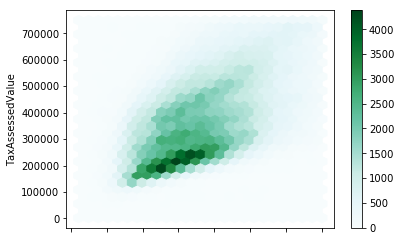

In [123]:
%matplotlib inline
# Make sure to use labels and not columns ie:'SqFtTotLiving' not kc_tax_df_slice.SqFtTotLiving!
ax = kc_tax_df_slice.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=25);

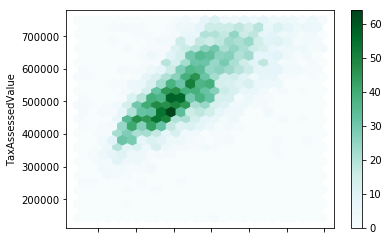

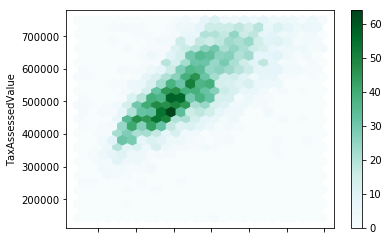

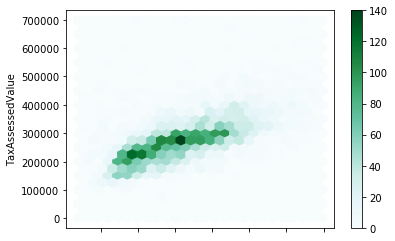

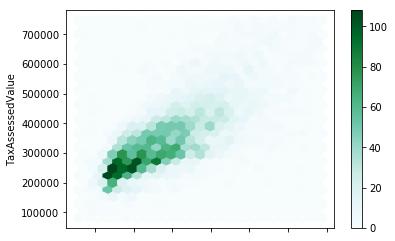

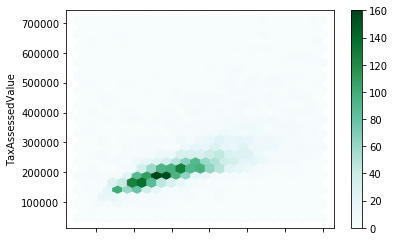

In [124]:
# Plot each zip code
zip_code_filter = [98188, 98105, 98108, 98126]
kc_tax_df_slice_group = kc_tax_df_slice[kc_tax_df_slice.ZipCode.isin(zip_code_filter)].groupby('ZipCode')
kc_tax_df_slice_group.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=25);

In [108]:
# kc_tax_df.ZipCode.isin([98117])
kc_tax_df_slice.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
4008,47497.0,990,98038.0
10091,47000.0,1320,98188.0
10284,61000.0,1280,0.0
10285,61000.0,1300,0.0
10562,64000.0,280,98070.0


In [110]:
kc_tax_df_slice.ZipCode.unique()

array([ 98038.,  98188.,      0.,  98070.,  98030.,  98288.,  98014.,
        98022.,  98108.,  98178.,  98052.,  98092.,  98045.,  98198.,
        98224.,  98107.,  98051.,  98008.,  98168.,  98010.,  98003.,
        98001.,  98019.,  98032.,  98053.,  98002.,  98058.,  98065.,
        98027.,  98199.,  98042.,  98055.,  98047.,  98144.,  98118.,
        98023.,  98146.])

In [115]:
kc_tax_df_slice[kc_tax_df_slice.ZipCode == 98047]

,TaxAssessedValue,SqFtTotLiving,ZipCode
277163,58000.0,340,98047.0
277800,63000.0,570,98047.0
278226,72000.0,580,98047.0
278432,67000.0,1180,98047.0
312092,72000.0,560,98047.0
463723,74000.0,1400,98047.0
